In [99]:
import numpy as np
import pandas as pd

### From dict of Series or dicts

In [100]:

d = {
    "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
    "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
}
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64, 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [101]:
df = pd.DataFrame(d)
df


,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [102]:
pd.DataFrame(d, index=["d", "b", "a"])


,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [103]:
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])


,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [104]:
#get index
df.index


Index(['a', 'b', 'c', 'd'], dtype='object')

In [105]:
#get columns
df.columns

Index(['one', 'two'], dtype='object')

### From dict of ndarrays / lists¶

In [106]:
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
pd.DataFrame(d)


,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [107]:
pd.DataFrame(d, index=["a", "b", "c", "d"])


,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


### From structured or record array

In [108]:
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "a10")])
data
# np.zeros((2,))


array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [109]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data


array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [110]:
pd.DataFrame(data)


,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


### From a list of dicts

In [111]:
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
data2

[{'a': 1, 'b': 2}, {'a': 5, 'b': 10, 'c': 20}]

In [112]:
pd.DataFrame(data2)


,a,b,c
0,1,2,NaN
1,5,10,20.0


In [113]:
pd.DataFrame(data2, index=["first", "second"])


,a,b,c
first,1,2,NaN
second,5,10,20.0


In [114]:
pd.DataFrame(data2, columns=["a", "b"])


,a,b
0,1,2
1,5,10


### From a dict of tuples¶

In [115]:
pd.DataFrame(
    {
        ("a", "b"): {("A", "B"): 1, ("A", "C"): 2},
        ("a", "a"): {("A", "C"): 3, ("A", "B"): 4},
        ("a", "c"): {("A", "B"): 5, ("A", "C"): 6},
        ("b", "a"): {("A", "C"): 7, ("A", "B"): 8},
        ("b", "b"): {("A", "D"): 9, ("A", "B"): 10},
    }
)

a              b      
       b    a    c    a     b
A B  1.0  4.0  5.0  8.0  10.0
  C  2.0  3.0  6.0  7.0   NaN
  D  NaN  NaN  NaN  NaN   9.0

### From a list of namedtuples

In [116]:
from collections import namedtuple
Point = namedtuple("Point", "x y")


In [117]:
pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])


,x,y
0,0,0
1,0,3
2,2,3


In [118]:
Point3D = namedtuple("Point3D", "x y z")


In [119]:
pd.DataFrame([Point3D(0, 0, 0), Point3D(0, 3, 5), Point(2, 3)])


,x,y,z
0,0,0,0.0
1,0,3,5.0
2,2,3,NaN


In [120]:
# data clesses
from dataclasses import make_dataclass
Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])


,0
0,"Point(x=0, y=0)"
1,"Point(x=0, y=3)"
2,"Point(x=2, y=3)"


### Alternate constructors
#### from dict

In [121]:
pd.DataFrame.from_dict(dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]))


,A,B
0,1,4
1,2,5
2,3,6


In [122]:
pd.DataFrame.from_dict(
    dict([("A", [1, 2, 3]), ("B", [4, 5, 6])]),
    orient="index",
    columns=["one", "two", "three"],
)


,one,two,three
A,1,2,3
B,4,5,6


### DataFrame.from_records

In [123]:
data


array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [124]:
pd.DataFrame.from_records(data, index="C")


,A,B
C,,
b'Hello',1,2.0
b'World',2,3.0


### Column selection, addition, deletion


In [125]:
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [126]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [127]:
df["three"] = df["one"] * df["two"]
df


,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


In [128]:
df["flag"] = df["one"] > 2
df


,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [129]:
del df["two"]
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [130]:
three = df.pop("three")
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


In [131]:
df["foo"] = "bar"
df


,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


In [132]:
df["one_trunc"] = df["one"][:2]
df

,one,flag,foo,one_trunc
a,1.0,False,bar,1.0
b,2.0,False,bar,2.0
c,3.0,True,bar,NaN
d,NaN,False,bar,NaN


In [133]:
#The insert function is available to insert at a particular location in the columns:
df.insert(1, "bar", df["one"])
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [138]:
iris = pd.read_csv("data/iris.csv")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
iris.assign(sepal_ratio=iris["sepal_width"] / iris["sepal_length"]).head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [145]:
# by passing a funtion
iris.assign(sepal_ratio=lambda x: (
    x["sepal_width"] / x["sepal_length"])).head()


,sepal_length,sepal_width,petal_length,petal_width,species,sepal_ratio
0,5.1,3.5,1.4,0.2,setosa,0.686275
1,4.9,3.0,1.4,0.2,setosa,0.612245
2,4.7,3.2,1.3,0.2,setosa,0.680851
3,4.6,3.1,1.5,0.2,setosa,0.673913
4,5.0,3.6,1.4,0.2,setosa,0.720000


In [148]:
iris.query("sepal_length > 5").head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
10,5.4,3.7,1.5,0.2,setosa
14,5.8,4.0,1.2,0.2,setosa
15,5.7,4.4,1.5,0.4,setosa


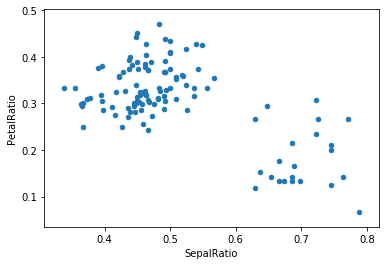

In [151]:
(
    iris.query("sepal_length > 5")
    .assign(
        SepalRatio=lambda x: x.sepal_width / x.sepal_length,
        PetalRatio=lambda x: x.petal_width / x.petal_length,
    ).plot(kind="scatter", x="SepalRatio", y="PetalRatio")
)

In [153]:
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])


,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [161]:
dfa['C']=dfa['A']+dfa['B']
dfa

,A,B,C
0,1,4,5
1,2,5,7
2,3,6,9


### Indexing / selection


In [163]:
df

,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0
c,3.0,3.0,True,bar,NaN
d,NaN,NaN,False,bar,NaN


In [165]:
#seletion by column
df['bar']

a    1.0
b    2.0
c    3.0
d    NaN
Name: bar, dtype: float64

In [170]:
#selection by row
df.loc['b']
df.iloc[2]


one             3
bar             3
flag         True
foo           bar
one_trunc     NaN
Name: c, dtype: object

In [167]:
#Select row by integer location
df.iloc[1]


one              2
bar              2
flag         False
foo            bar
one_trunc        2
Name: b, dtype: object

In [169]:
#Slice rows
df[:2]


,one,bar,flag,foo,one_trunc
a,1.0,1.0,False,bar,1.0
b,2.0,2.0,False,bar,2.0


### Data alignment and arithmetic